# Axon growth quantification

In [1]:
import napari
import numpy as np
from glob import glob
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import re

First of all, specify the name of a measurement and folder name.

In [2]:
print('what is the name of a measurement?')
name = input()
print('where is it located?')
folder_name = input()

what is the name of a measurement?
test2
where is it located?
data


Next cell will open the swc files from the folder and save them in the readable for Python format. Be sure to correctly specify the folder name! 

In [3]:
axons = read_axon(folder_name)
print('Number of time points is', len(axons))

Number of time points is 8


Next cell would shift origins of axons from different time points to the one point. 

In [4]:
shifted_axons = shift_axon(axons)
print('Axons from different time points were shifted to the same origin')

Axons from different time points were shifted to the same origin


In [6]:
# vizualize the growth
growth = np.array( [axon[-1] for axon in shifted_axons])

# save growth to csv
growth.tofile(f'growth_{name}.csv',sep=',',format='%10.5f')

Next cell will visualize all axons from different time points, each with unique color in the open Viewer.

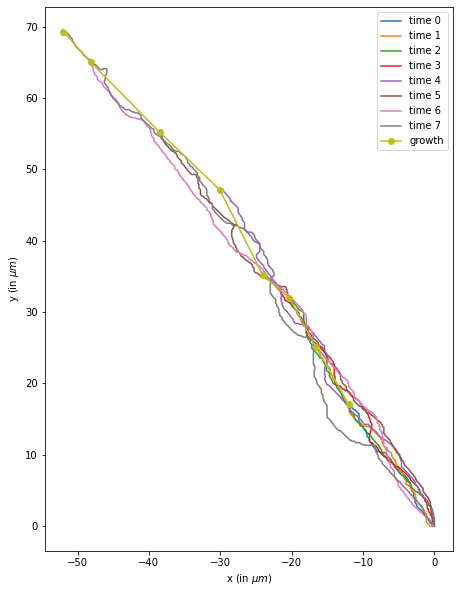

In [7]:
# use matplotlib to plot the axons
fig, ax = plt.figure(figsize=(10,10)), plt.axes()
for i, axon in enumerate(shifted_axons):
    ax.plot(axon[:,0], axon[:,1], label = 'time ' + str(i))
    
ax.plot(growth[:,0], growth[:,1], 'o-', label='growth')
ax.legend()
ax.set_aspect('equal')
# set x and y titles
ax.set_xlabel('x (in $\mu m$)')
ax.set_ylabel('y (in $\mu m$)')
plt.show()

The below cell would compute the required parameters for each time point.

In [8]:
# check if there is already a file with measurements
if os.path.isfile(f'measurements.csv'):
    measurements = pd.read_csv('measurements.csv')
    # create dictionary from the dataframe
    measurements = measurements.to_dict('list')
else:
    measurements = defaultdict(list) # set measurements dictionary

# set columns names 
columns = ['Name of a measurement', 'Time', 'Coordinate of the tip node', 'Axon length ($\mu m$)', 'Speed from $t_{i-1}$ to $t_{i}$ ($\mu m / \text{sec}$)',
        'Axon growth distance from $t_{i-1}$ to $t_{i}$ ($\mu m$)',  'Angle change from $t_{i-1}$ to $t_{i}$ (%)', 'Total growth during all time ($\mu m$)', 
        'Total speed during all time ($\mu m / \text{sec}$)', 'Total angle change (%)']

origin = shifted_axons[0][0] # set origin
prev_tip = origin

measurements = measure(shifted_axons, measurements, prev_tip, columns, origin, name)

time: 0
last tip is [-12.011393  17.062913]
axon growth at time 0 is 20.866637530901265
speed of growth at time 0 is 0
angle change at time 0 is 0
time: 900
last tip is [-16.61389   25.145346]
axon growth at time 900 is 30.138177887719348
speed of growth at time 900 is 0.010334450467361261
angle change at time 900 is 174.51558169744104
time: 1800
last tip is [-20.318338  31.992962]
axon growth at time 1800 is 37.89966327839455
speed of growth at time 1800 is 0.008650467757863007
angle change at time 1800 is 178.75354990227265
time: 2700
last tip is [-24.022786  35.136131]
axon growth at time 2700 is 42.563387422184306
speed of growth at time 2700 is 0.005398038778199397
angle change at time 2700 is 158.72677059625056
time: 3600
last tip is [-30.084611  47.147525]
axon growth at time 3600 is 55.92828383427249
speed of growth at time 3600 is 0.014949268455360801
angle change at time 3600 is 157.09294952460212
time: 4500
last tip is [-38.503812  55.229957]
axon growth at time 4500 is 67.3

### Next cell is not compulsory and can be used to visualize the computed data.

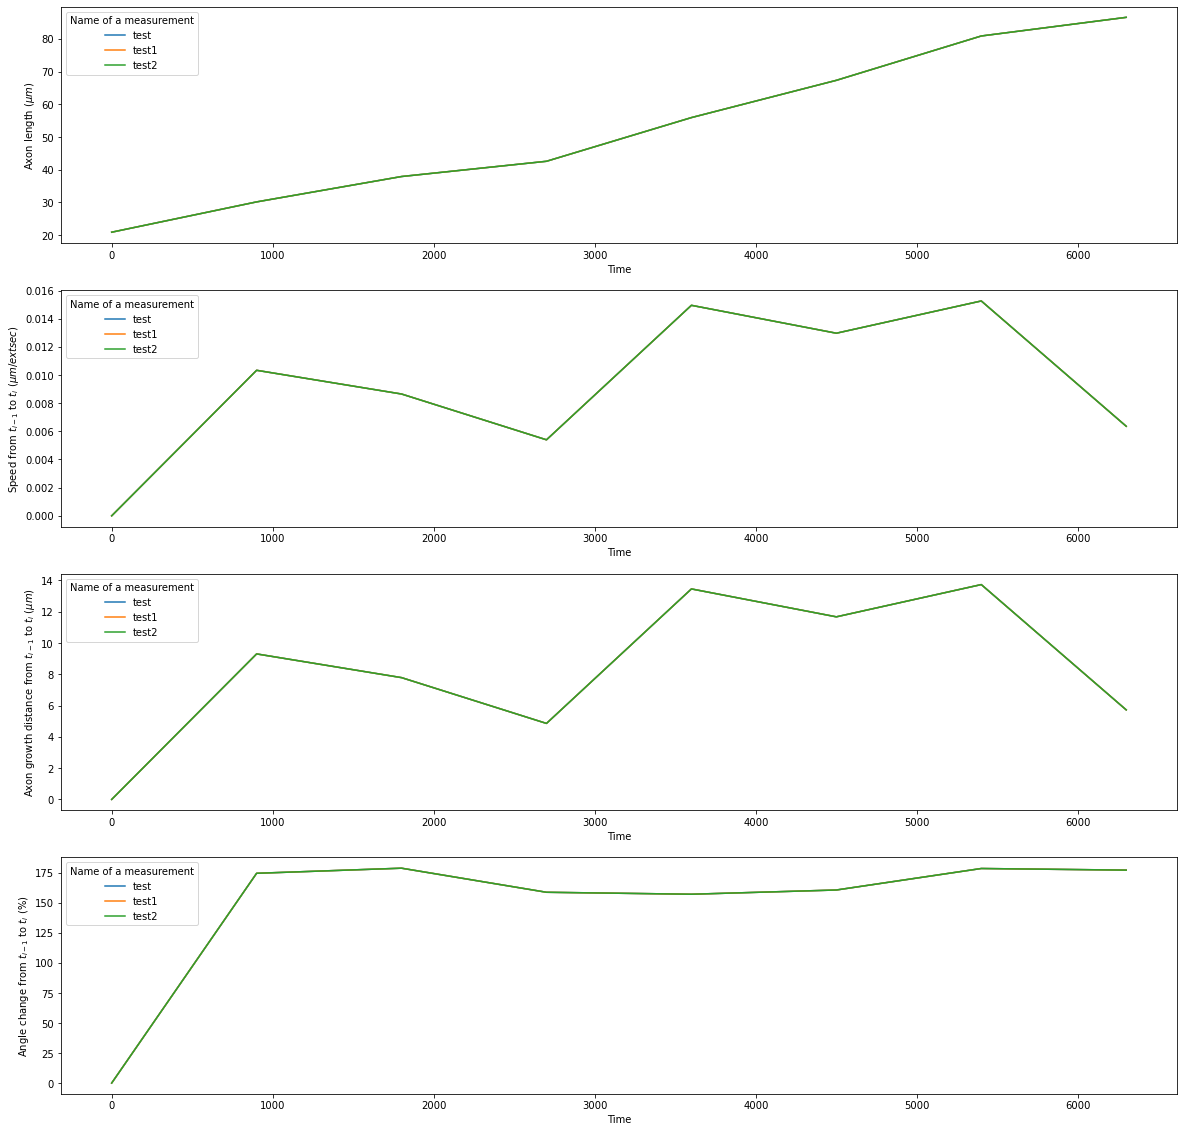

In [9]:
columns_to_show = ['Axon length ($\mu m$)', 'Speed from $t_{i-1}$ to $t_{i}$ ($\mu m / \text{sec}$)',
        'Axon growth distance from $t_{i-1}$ to $t_{i}$ ($\mu m$)',  'Angle change from $t_{i-1}$ to $t_{i}$ (%)']

# visualize all columns in a single plot
fig, ax = plt.subplots(4, 1, figsize=(20, 20))
for i, column in enumerate(columns_to_show):
    sns.lineplot(x=columns[1], y=column, data=measurements, ax=ax[i], hue='Name of a measurement')

In [10]:
measurements

,Name of a measurement,Time,Coordinate of the tip node,Axon length ($\mu m$),Speed from $t_{i-1}$ to $t_{i}$ ($\mu m / \text{sec}$),Axon growth distance from $t_{i-1}$ to $t_{i}$ ($\mu m$),Angle change from $t_{i-1}$ to $t_{i}$ (%),Total growth during all time ($\mu m$),Total speed during all time ($\mu m / \text{sec}$),Total angle change (%)
0,test,0,[-12.011393 17.062913],20.866638,0.000000,0.000000,0.000000,65.740344,0.584359,0.000000
1,test,900,[-16.61389 25.145346],30.138178,0.010334,9.301005,174.515582,65.740344,0.584359,174.515582
2,test,1800,[-20.318338 31.992962],37.899663,0.008650,7.785421,178.753550,65.740344,0.584359,178.753550
3,test,2700,[-24.022786 35.136131],42.563387,0.005398,4.858235,158.726771,65.740344,0.584359,158.726771
4,test,3600,[-30.084611 47.147525],55.928284,0.014949,13.454342,157.092950,65.740344,0.584359,157.092950
5,test,4500,[-38.503812 55.229957],67.326753,0.012968,11.670846,160.609698,65.740344,0.584359,160.609698
6,test,5400,[-48.157828 64.99623 ],80.893055,0.015258,13.732447,178.499669,65.740344,0.584359,178.499669
7,test,6300,[-51.974533 69.261958],86.594289,0.006360,5.723956,177.151366,65.740344,0.584359,177.151366
8,test1,0,[-12.011393 17.062913],20.866638,0.000000,0.000000,0.000000,65.740344,0.584359,0.000000
9,test1,900,[-16.61389 25.145346],30.138178,0.010334,9.301005,174.515582,65.740344,0.584359,174.515582
